# Introduction to Convulational Neural Networks

In [ ]:
# Get the data
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2023-10-19 01:53:03--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.125.207, 142.250.136.207, 142.250.148.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.125.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   150MB/s    in 0.7s    

2023-10-19 01:53:04 (150 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

## Inspect the data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [ ]:
import os
# Walk thru pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are len{ len(dirnames)} directories and {len(filenames)} imaes in /{dirpath}")

There are len2 directories and 0 imaes in /pizza_steak
There are len2 directories and 0 imaes in /pizza_steak/train
There are len0 directories and 750 imaes in /pizza_steak/train/steak
There are len0 directories and 750 imaes in /pizza_steak/train/pizza
There are len2 directories and 0 imaes in /pizza_steak/test
There are len0 directories and 250 imaes in /pizza_steak/test/steak
There are len0 directories and 250 imaes in /pizza_steak/test/pizza


In [ ]:
num_steak_images = len(os.listdir("pizza_steak/train/steak"))
num_steak_images

750

To visualize our images, first let get the class names programmatically

In [ ]:
# Get the class names programatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
print(data_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

pizza_steak/train


array(['pizza', 'steak'], dtype='<U5')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(target_dir, target_class):
  # Set up the target directory
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image with matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])

  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

Image shape: (384, 512, 3)


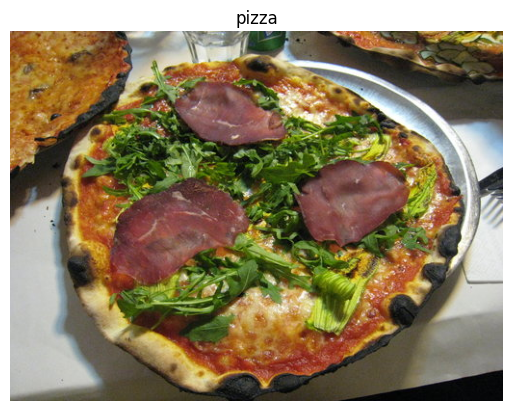

In [ ]:
img = view_random_image("pizza_steak/train/", "pizza")


In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[158, 115, 109],
        [160, 116, 107],
        [120,  77,  61],
        ...,
        [ 92,  73,   7],
        [ 91,  68,   1],
        [ 98,  73,   6]],

       [[161, 116,  87],
        [159, 114,  83],
        [127,  81,  45],
        ...,
        [106,  83,  16],
        [110,  81,  13],
        [115,  85,  15]],

       [[157, 106,  53],
        [155, 104,  51],
        [132,  83,  27],
        ...,
        [122,  94,  29],
        [125,  95,  25],
        [120,  86,  15]],

       ...,

       [[124, 125, 111],
        [124, 125, 111],
        [124, 124, 112],
        ...,
        [  6,   7,   9],
        [  7,   8,  10],
        [  8,   9,  11]],

       [[116, 117, 101],
        [115, 116, 100],
        [113, 114, 100],
        ...,
        [  6,   7,   9],
        [  7,   8,  10],
        [  8,   9,  11]],

       [[110, 111,  93],
        [107, 108,  92],
        [103, 104,  88],
        ...,
        [  6,   7,   

In [ ]:
# View image shape
img.shape # returns width, height, and color channels

(384, 512, 3)

In [ ]:
# Get all pixel values between 0 and 1. However, we cannot do this for every image
img/255.

array([[[0.61960784, 0.45098039, 0.42745098],
        [0.62745098, 0.45490196, 0.41960784],
        [0.47058824, 0.30196078, 0.23921569],
        ...,
        [0.36078431, 0.28627451, 0.02745098],
        [0.35686275, 0.26666667, 0.00392157],
        [0.38431373, 0.28627451, 0.02352941]],

       [[0.63137255, 0.45490196, 0.34117647],
        [0.62352941, 0.44705882, 0.3254902 ],
        [0.49803922, 0.31764706, 0.17647059],
        ...,
        [0.41568627, 0.3254902 , 0.0627451 ],
        [0.43137255, 0.31764706, 0.05098039],
        [0.45098039, 0.33333333, 0.05882353]],

       [[0.61568627, 0.41568627, 0.20784314],
        [0.60784314, 0.40784314, 0.2       ],
        [0.51764706, 0.3254902 , 0.10588235],
        ...,
        [0.47843137, 0.36862745, 0.11372549],
        [0.49019608, 0.37254902, 0.09803922],
        [0.47058824, 0.3372549 , 0.05882353]],

       ...,

       [[0.48627451, 0.49019608, 0.43529412],
        [0.48627451, 0.49019608, 0.43529412],
        [0.48627451, 0

## An end to end example

Build a convolutional NN to find patterns in our images:
- Load our images
- Preprocess our images
- Build a CNN to find patterns in our images
- COmpile our CNN
- Fit the CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# Preprocess data (get all of the pixel values betweem 0 and 1)
train_datagen = ImageDataGenerator(
    rescale=1./255
)

valid_datagen = ImageDataGenerator(rescale=1./255)

# Setu paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)


valid_data = valid_datagen.flow_from_directory(
    directory=test_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    seed=42
)

# Build CNN model (same as the tiny VGG)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=3,
        activation="relu",
        input_shape=(224,224,3)
    ),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
     tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")

])

# Compile our CNN

model_1.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit model
history_1 = model_1.fit(train_data, epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 22s 155ms/step - loss: 0.6193 - accuracy: 0.6673 - val_loss: 0.4614 - val_accuracy: 0.7840
Epoch 2/5
47/47 [==============================] - 6s 118ms/step - loss: 0.4375 - accuracy: 0.8127 - val_loss: 0.3904 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 7s 139ms/step - loss: 0.4109 - accuracy: 0.8133 - val_loss: 0.3655 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 6s 119ms/step - loss: 0.3745 - accuracy: 0.8527 - val_loss: 0.3481 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 6s 136ms/step - loss: 0.3508 - accuracy: 0.8533 - val_loss: 0.3754 - val_accuracy: 0.8360


In [ ]:
# Get a model summary()
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 29160)             0

## using the same model as before

Lets use the previous model we build in previous section to see if it works

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 112ms/step - loss: 0.8316 - accuracy: 0.5053 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 110ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 126ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 107ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 7s 157ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model_2 performs terribly, lets try to improving it

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')

])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 140ms/step - loss: 4.8494 - accuracy: 0.6007 - val_loss: 0.5623 - val_accuracy: 0.7400
Epoch 2/5
47/47 [==============================] - 5s 108ms/step - loss: 0.6921 - accuracy: 0.7113 - val_loss: 0.6634 - val_accuracy: 0.6600
Epoch 3/5
47/47 [==============================] - 7s 139ms/step - loss: 0.6042 - accuracy: 0.7467 - val_loss: 0.4926 - val_accuracy: 0.7580
Epoch 4/5
47/47 [==============================] - 5s 110ms/step - loss: 0.5806 - accuracy: 0.7473 - val_loss: 0.4299 - val_accuracy: 0.7900
Epoch 5/5
47/47 [==============================] - 5s 113ms/step - loss: 0.5416 - accuracy: 0.7567 - val_loss: 0.5091 - val_accuracy: 0.7880


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Binary classification

1 . Become one with the data
2. Preprocess the data
3. Create a model
4. Fit the model
5. Evaluate the model
6. Adjsut different params and improve the model
7. Repeat until satisfied

# 1. Becone one with the data

Image shape: (384, 512, 3)
Image shape: (512, 512, 3)


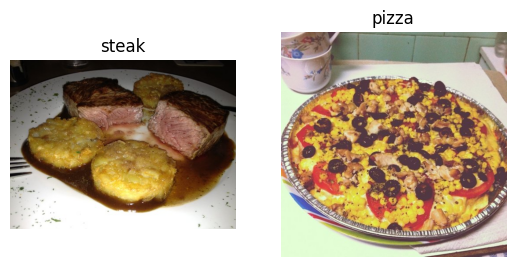

In [ ]:
plt.figure()
plt.subplot(1, 2, 1 )
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2 )
steak_img = view_random_image("pizza_steak/train/", "pizza")

## 2. Pre process the data

In [ ]:
# Define a directory data paths
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

Our next step is to turn our data into batches

A batch is a small subset of data. Rather than look at all images at one time. a model migh only look at 32 at a time

It does it for:
- 11000 images or more migh not fit into memoy of your processor
- Try to learn the patterns could result in the model not being able to learn very well


In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data from directories and turn them into batches

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224), # Target size of images (height, width)
                                               class_mode="binary", # Type of data you are working with
                                               batch_size=32) # Size of a.k.a minibatches to load data into model

test_data =  test_datagen.flow_from_directory(directory=test_dir,
                                              target_size=(224, 224),
                                              class_mode="binary",
                                              batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of train data batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [ ]:
# How many baches are there?
len(train_data)

47

In [ ]:
1500/32

46.875

In [ ]:
# Get the first two images

images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [ ]:
images[7].shape

(224, 224, 3)

In [ ]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

## 3. Create a CNN model (start with a baseline)

 A baseline is a realively simple model or existing result that you setup when beggining a machine learning exprimenting, you try to beat the baseline

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
from tensorflow.random import set_seed

In [ ]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding='valid',
         activation='relu',
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

In [ ]:
from keras.src.metrics.probabilistic_metrics import binary_crossentropy
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy'])

 Fit the model

In [ ]:

# Check lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
history_4 = model_4.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 126ms/step - loss: 2.7373 - accuracy: 0.6540 - val_loss: 0.4665 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 6s 132ms/step - loss: 0.4892 - accuracy: 0.7707 - val_loss: 0.4222 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 5s 116ms/step - loss: 0.4013 - accuracy: 0.8280 - val_loss: 0.3750 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 6s 134ms/step - loss: 0.3057 - accuracy: 0.8787 - val_loss: 0.3637 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 7s 139ms/step - loss: 0.1944 - accuracy: 0.9367 - val_loss: 0.4030 - val_accuracy: 0.8120


In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 1s 81ms/step - loss: 0.3754 - accuracy: 0.8360


[0.37537792325019836, 0.8360000252723694]

### 5. Evaluate model

In [ ]:
model_4.evaluate(test_data)

16/16 [==============================] - 1s 86ms/step - loss: 0.4030 - accuracy: 0.8120


[0.40303754806518555, 0.8119999766349792]

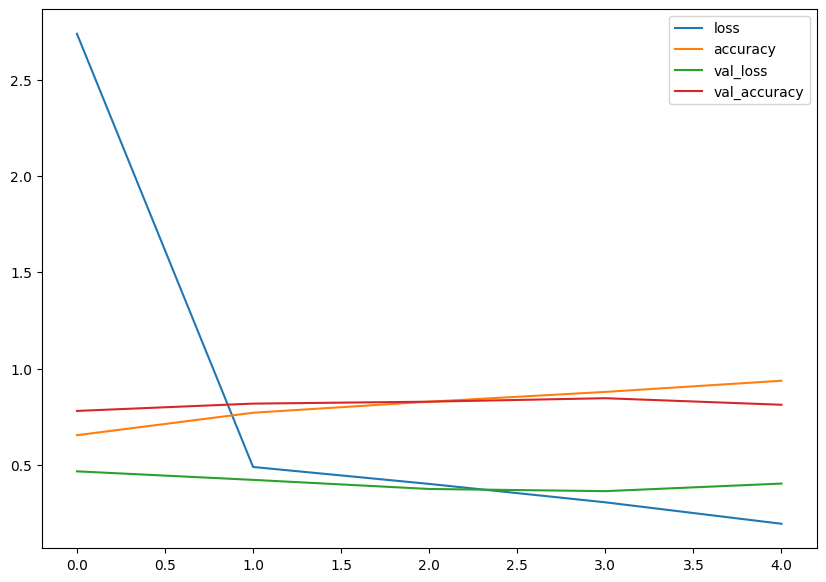

In [ ]:

# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [ ]:
# PLot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for validating and training metrics
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # plot loss
  plt.plot(epochs, loss, label="Training_loss")
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()

  # PLot accuracy
  plt.figure()
  plt.plot(epochs, acc, label="training_accuracy")
  plt.plot(epochs, val_acc, label='val_accuracy')
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()


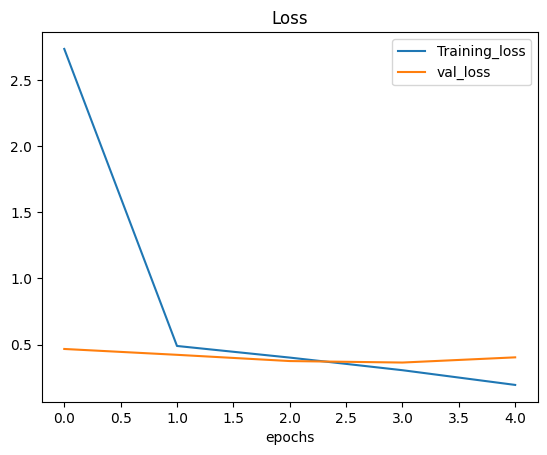

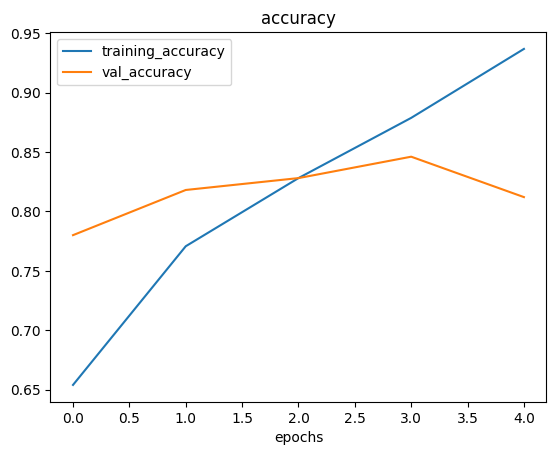

In [ ]:
# CHeck out the loss and accuray model_4
plot_loss_curves(history_4)

The ideal position for these two curves is to follow each other. If anything, the validation curve should be slightly under the training curve. If there's a large gap between the training curve and validation curve, it means your model is probably overfitting.

## 6. Adjust model parameters

Fitting a machine learning model comes in 3 steps:
0. Create a basline.

1. Beat the baseline by overfitting a larger model.
2. Reduce overfitting.

So far we've gone through steps 0 and 1.

And there are even a few more things we could try to further overfit our model:

- Increase the number of convolutional layers.
- Increase the number of convolutional filters.
- Add another dense layer to the output of our flattened layer.



In [ ]:
# Create the model (this is going to be the new baseline)

model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
   Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
  Flatten(),
    Dense(1, activation="sigmoid")

])

In [ ]:
model_5.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=['accuracy']
)

In [ ]:
history_5 = model_5.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 159ms/step - loss: 0.6026 - accuracy: 0.6647 - val_loss: 0.4785 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 6s 120ms/step - loss: 0.4711 - accuracy: 0.7927 - val_loss: 0.4003 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 6s 124ms/step - loss: 0.4546 - accuracy: 0.7967 - val_loss: 0.4353 - val_accuracy: 0.8040
Epoch 4/5
47/47 [==============================] - 5s 113ms/step - loss: 0.4485 - accuracy: 0.8007 - val_loss: 0.4719 - val_accuracy: 0.7720
Epoch 5/5
47/47 [==============================] - 6s 133ms/step - loss: 0.4308 - accuracy: 0.8107 - val_loss: 0.3597 - val_accuracy: 0.8540


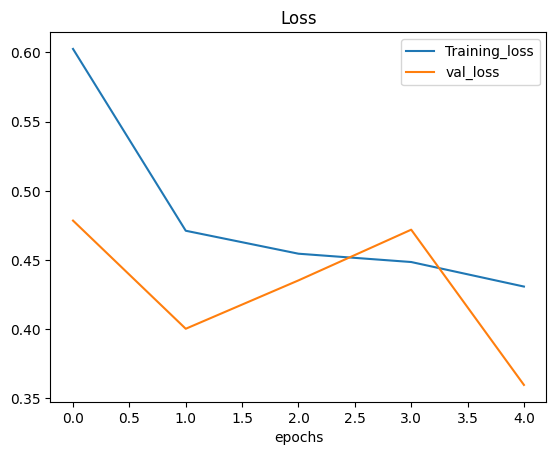

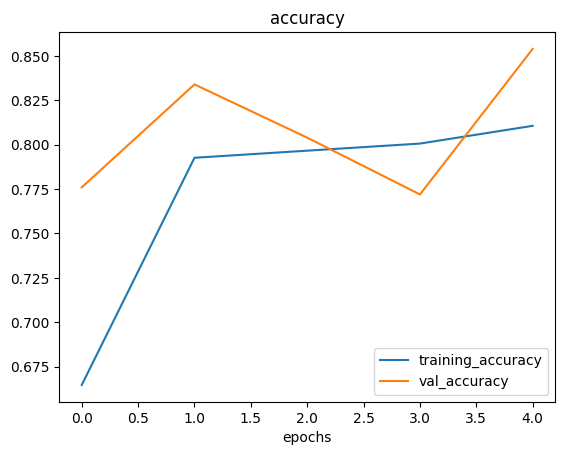

In [ ]:
# CHeck out the loss and accuray model_5
plot_loss_curves(history_5)

In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

### Review Data Augmentation

In [ ]:
# Create ImageDataGenerator training  instance with data augmentation

train_datagen_augmented = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.3,
    horizontal_flip=True
)

# Create imageDataGenerator without data augmentation

train_datagen = ImageDataGenerator(
    rescale=1/255.
)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(
    rescale=1/255.
)

❓ What is data augmentation?

It is the preocess to modify our training data to have more diversity and lead our model to learn more patterns. This means adjusting ratotation, flipping, zoom, etc



In [ ]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


Note: Data augmentation is usully used only on the training data.

Lets visualize some augmented data

In [ ]:
# Get sample  data
images, labels = train_data.next()
augmented_images, _ = train_data_augmented.next() # Labels are not augmented

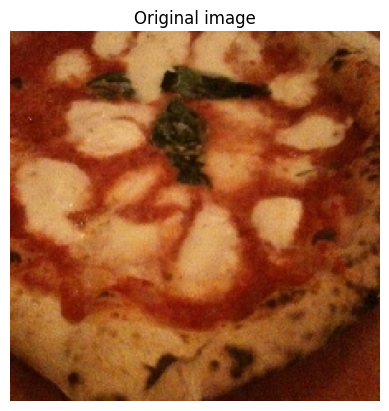

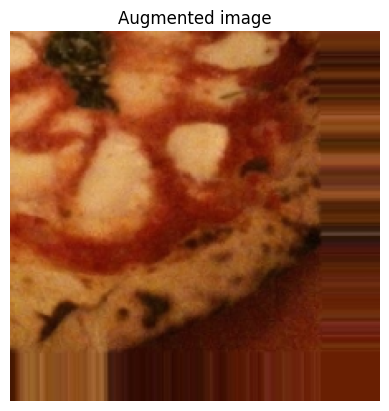

In [ ]:
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [ ]:
from tensorflow.python.ops.gen_nn_ops import MaxPool
# Create CNN model with augmented dataset

model_6 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")]
)

model_6.compile(
    loss="binary_crossentropy",
    optimizer= Adam(),
    metrics=['accuracy']
)

history_6 = model_6.fit(train_data_augmented,
            epochs=5,
            steps_per_epoch=len(train_data_augmented),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 431ms/step - loss: 0.7180 - accuracy: 0.5720 - val_loss: 0.6781 - val_accuracy: 0.5500
Epoch 2/5
47/47 [==============================] - 22s 461ms/step - loss: 0.7172 - accuracy: 0.4453 - val_loss: 0.6773 - val_accuracy: 0.5060
Epoch 3/5
47/47 [==============================] - 22s 465ms/step - loss: 0.6956 - accuracy: 0.4493 - val_loss: 0.6850 - val_accuracy: 0.6400
Epoch 4/5
47/47 [==============================] - 21s 439ms/step - loss: 0.6956 - accuracy: 0.5020 - val_loss: 0.6832 - val_accuracy: 0.6880
Epoch 5/5
47/47 [==============================] - 22s 465ms/step - loss: 0.6892 - accuracy: 0.5800 - val_loss: 0.6451 - val_accuracy: 0.7400


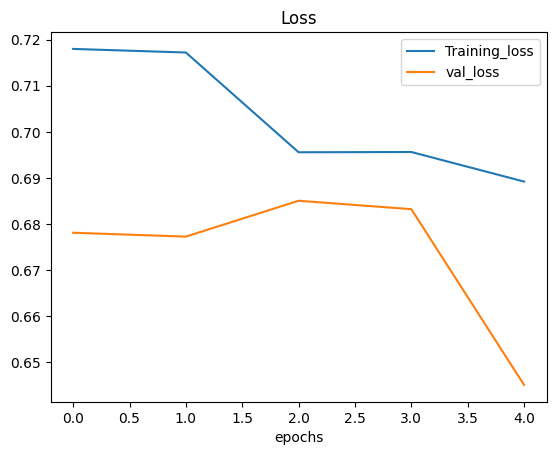

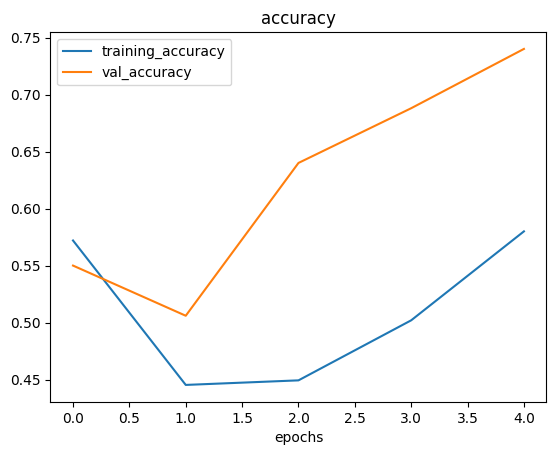

In [ ]:
plot_loss_curves(history_6)

Now lets modify the shuffle paratemer to be True in the train data augmented

In [ ]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=True) # Change to True

Augmented training images:
Found 1500 images belonging to 2 classes.


In [ ]:
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")]
)

model_7.compile(
    loss="binary_crossentropy",
    optimizer= Adam(),
    metrics=['accuracy']
)

history_7 = model_7.fit(train_data_augmented,
            epochs=5,
            steps_per_epoch=len(train_data_augmented),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 456ms/step - loss: 0.6606 - accuracy: 0.5987 - val_loss: 0.5296 - val_accuracy: 0.7640
Epoch 2/5
47/47 [==============================] - 22s 463ms/step - loss: 0.5541 - accuracy: 0.7240 - val_loss: 0.4050 - val_accuracy: 0.8060
Epoch 3/5
47/47 [==============================] - 22s 470ms/step - loss: 0.5076 - accuracy: 0.7580 - val_loss: 0.3901 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 21s 440ms/step - loss: 0.5103 - accuracy: 0.7513 - val_loss: 0.3674 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 22s 465ms/step - loss: 0.4921 - accuracy: 0.7740 - val_loss: 0.3658 - val_accuracy: 0.8400


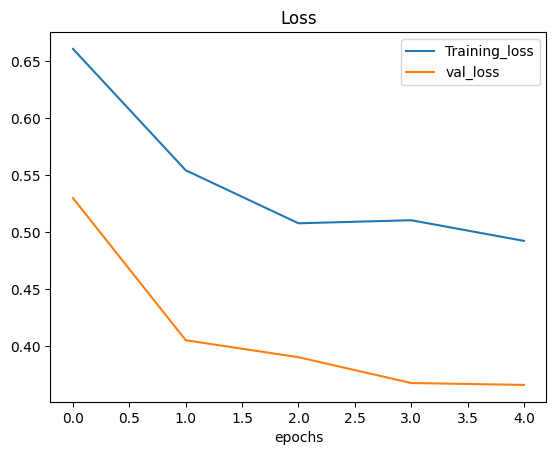

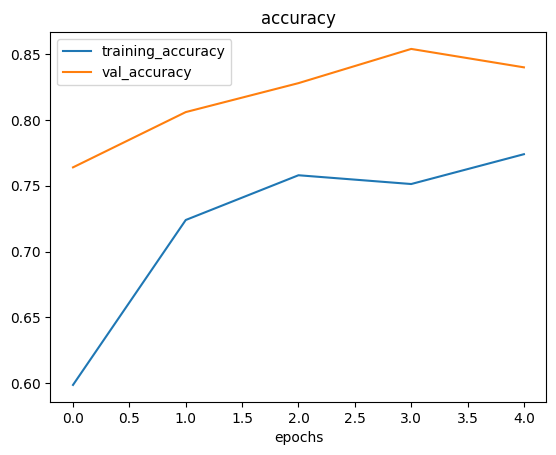

In [ ]:
plot_loss_curves(history_7)

When suffuling training data, the model gets exposed to all different kinds of data and learn features across a wide array of images

### 7. Repeat until satisfied

Since we already beat our baseline, there are a few things we could try to continue to improve our model:
* Increase the number of model layers
* Increase the number of filters in each convulutional layers
* Train for longer
* Find an ideal learning rate
* Get more data
* Use transfer learning

### Increase the number of model layers

In [ ]:
# Increase number of model layers
model_8 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")]
)

model_8.compile(
    loss="binary_crossentropy",
    optimizer= Adam(),
    metrics=['accuracy']
)

history_8 = model_8.fit(train_data_augmented,
            epochs=5,
            steps_per_epoch=len(train_data_augmented),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 456ms/step - loss: 0.6888 - accuracy: 0.5713 - val_loss: 0.6387 - val_accuracy: 0.7100
Epoch 2/5
47/47 [==============================] - 22s 461ms/step - loss: 0.6241 - accuracy: 0.6593 - val_loss: 0.4950 - val_accuracy: 0.7720
Epoch 3/5
47/47 [==============================] - 22s 469ms/step - loss: 0.5775 - accuracy: 0.7013 - val_loss: 0.4368 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 21s 454ms/step - loss: 0.5353 - accuracy: 0.7440 - val_loss: 0.4097 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 22s 472ms/step - loss: 0.5161 - accuracy: 0.7540 - val_loss: 0.4167 - val_accuracy: 0.8480


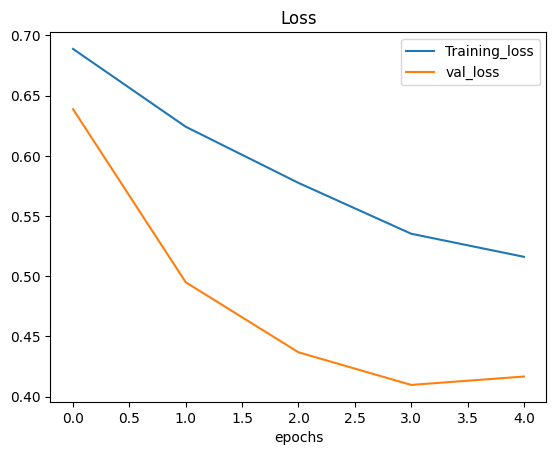

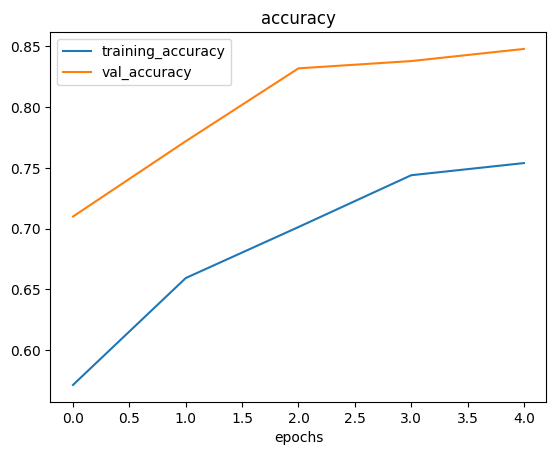

In [ ]:
plot_loss_curves(history_8)

### Increase the number of filters in each convulutional layers

In [ ]:
# Increase number of model layers
model_9 = Sequential([
    Conv2D(32, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(32, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(32, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(32, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")]
)

model_9.compile(
    loss="binary_crossentropy",
    optimizer= Adam(),
    metrics=['accuracy']
)

history_9 = model_9.fit(train_data_augmented,
            epochs=5,
            steps_per_epoch=len(train_data_augmented),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 493ms/step - loss: 0.6410 - accuracy: 0.6333 - val_loss: 0.5890 - val_accuracy: 0.6320
Epoch 2/5
47/47 [==============================] - 22s 474ms/step - loss: 0.5586 - accuracy: 0.7327 - val_loss: 0.4215 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 22s 475ms/step - loss: 0.5230 - accuracy: 0.7387 - val_loss: 0.5546 - val_accuracy: 0.6740
Epoch 4/5
47/47 [==============================] - 23s 480ms/step - loss: 0.5144 - accuracy: 0.7613 - val_loss: 0.3770 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 23s 480ms/step - loss: 0.4680 - accuracy: 0.7760 - val_loss: 0.3636 - val_accuracy: 0.8340


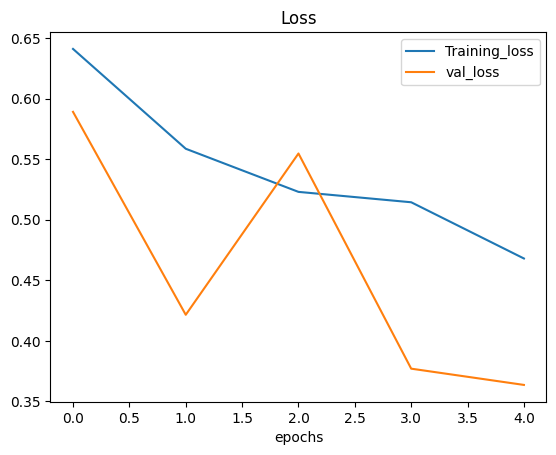

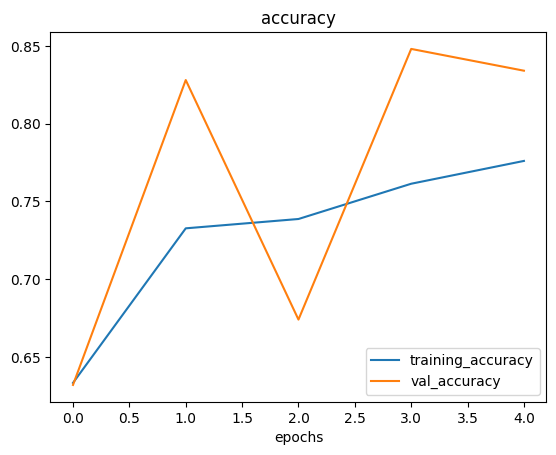

In [ ]:
plot_loss_curves(history_9)

### Train for longer

In [ ]:
# Increase number of model layers
model_10 = Sequential([
    Conv2D(32, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(32, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(32, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(32, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")]
)

model_10.compile(
    loss="binary_crossentropy",
    optimizer= Adam(),
    metrics=['accuracy']
)

history_10 = model_10.fit(train_data_augmented,
            epochs=10,
            steps_per_epoch=len(train_data_augmented),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 24s 458ms/step - loss: 0.6900 - accuracy: 0.5380 - val_loss: 0.6343 - val_accuracy: 0.6680
Epoch 2/10
47/47 [==============================] - 21s 451ms/step - loss: 0.5910 - accuracy: 0.6873 - val_loss: 0.4279 - val_accuracy: 0.8120
Epoch 3/10
47/47 [==============================] - 22s 479ms/step - loss: 0.5308 - accuracy: 0.7460 - val_loss: 0.3745 - val_accuracy: 0.8380
Epoch 4/10
47/47 [==============================] - 22s 476ms/step - loss: 0.4975 - accuracy: 0.7640 - val_loss: 0.4117 - val_accuracy: 0.8220
Epoch 5/10
47/47 [==============================] - 24s 502ms/step - loss: 0.4887 - accuracy: 0.7667 - val_loss: 0.3996 - val_accuracy: 0.8180
Epoch 6/10
47/47 [==============================] - 21s 456ms/step - loss: 0.4846 - accuracy: 0.7787 - val_loss: 0.6319 - val_accuracy: 0.7180
Epoch 7/10
47/47 [==============================] - 22s 468ms/step - loss: 0.4569 - accuracy: 0.7947 - val_loss: 0.3161 - val_accuracy: 0.8660

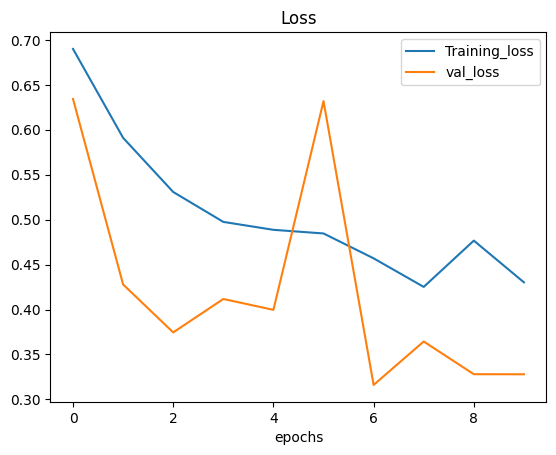

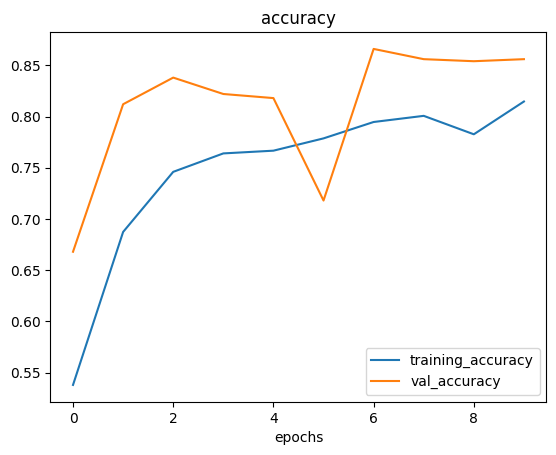

In [ ]:
plot_loss_curves(history_10)

# Make a prediction with our trained model on ouw custom data

In [ ]:
print(class_names)

['pizza' 'steak']


In [ ]:
# View our example image

--2023-10-19 02:09:46--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.07s   

2023-10-19 02:09:47 (27.7 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



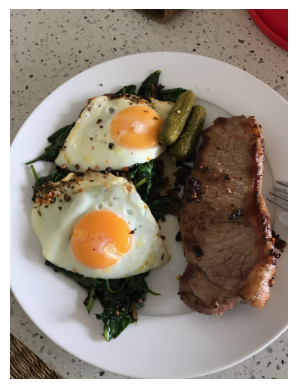

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
# Check the shape of our iamge
steak.shape

(4032, 3024, 3)

In [ ]:
expanded_steak = tf.expand_dims(steak, axis=0)

When training a neural network, you want to make a prediction with it on your own custom data, its importan that your data is preprocessed into the same format as the data your model was trained on

In [ ]:
# create a helper function to import an image and resize it to be able to use it in our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes to to
  (img_shape, img_shape, color_channels)
  """
  # read iamge
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor
  img = tf.image.decode_image(img)

  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])

  # Rescale image (get values between 0 and 1)
  img = img/255.

  # Expand dim
  #img = tf.expand_dims(img, axis=0)

  return img

In [ ]:
# Load in and preprocess our custome image
steak = load_and_prep_image("/content/03-steak.jpeg", 224)
steak.shape

TensorShape([224, 224, 3])

In [ ]:
pred = model_10.predict(tf.expand_dims(steak, axis=0))
pred

1/1 [==============================] - 0s 18ms/step


array([[0.9633689]], dtype=float32)

Looks like our custom image is being put through our model, but it currently outputs a prediction

In [ ]:
# Remind ourselved of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# We can index the predicted class by rounding the prediction probability
# and indexing it on the class names

pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title
  """

  # Import the target image and preprocess it

  img = load_and_prep_image(filename, 224)
  print(img.shape)

  # Make prediciton
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # PLot image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)


(224, 224, 3)
1/1 [==============================] - 0s 151ms/step


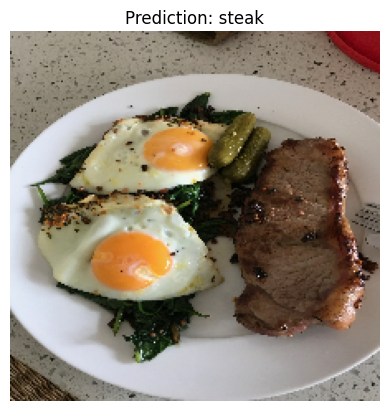

In [ ]:
# Test our model on a custom image
pred_and_plot(model_7, "/content/03-steak.jpeg",class_names)

(-0.5, 639.5, 426.5, -0.5)

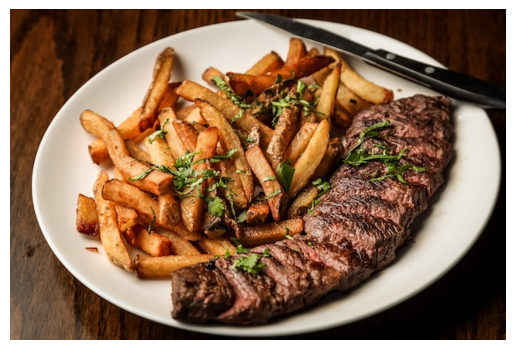

In [ ]:
# steak_2 = mpimg.imread("/content/steak.jpg")
# plt.imshow(steak_2)
# plt.axis(False)

In [ ]:
# img_2 = load_and_prep_image("/content/steak.jpg", 224)
# img_2.shape

TensorShape([224, 224, 3])

In [ ]:
# model_10.predict(tf.expand_dims(img_2, axis=0))

1/1 [==============================] - 0s 31ms/step


array([[0.99377835]], dtype=float32)

(224, 224, 3)
1/1 [==============================] - 0s 22ms/step


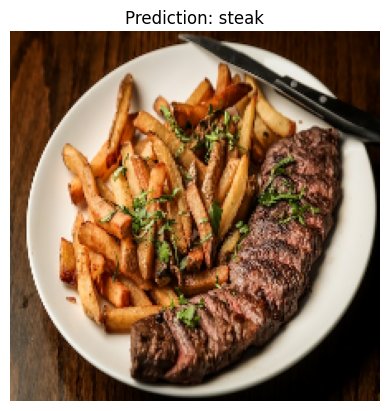

In [ ]:
# pred_and_plot(model_10, "/content/steak.jpg",class_names)

(224, 224, 3)
1/1 [==============================] - 0s 53ms/step


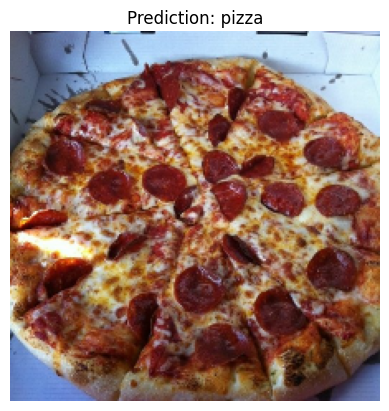

In [ ]:
#!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_10, "/content/pizza_steak/test/pizza/1001116.jpg", class_names)

# Multi-class Image Classification
1. Become one with the data
2. Preprocess the data
3. Create a model
4. Fit the model
5. Evaluate the model
6. Adjusto different hyperparameters
7. Repeat until satisfied

### 1. Become one with the data

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-10-20 00:51:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.207, 74.125.135.207, 74.125.142.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   165MB/s    in 3.0s    

2023-10-20 00:51:13 (165 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os
# Walk through 10 classes of food image data

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in 10_food_classes_all_data
There are 10 directories and 0 images in 10_food_classes_all_data/test
There are 0 directories and 250 images in 10_food_classes_all_data/test/ramen
There are 0 directories and 250 images in 10_food_classes_all_data/test/hamburger
There are 0 directories and 250 images in 10_food_classes_all_data/test/pizza
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_wings
There are 0 directories and 250 images in 10_food_classes_all_data/test/fried_rice
There are 0 directories and 250 images in 10_food_classes_all_data/test/grilled_salmon
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_curry
There are 0 directories and 250 images in 10_food_classes_all_data/test/ice_cream
There are 0 directories and 250 images in 10_food_classes_all_data/test/sushi
There are 0 directories and 250 images in 10_food_classes_all_data/test/steak
There are 10 directories and 0 images in 10_fo

In [3]:
# Setup train antes directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [4]:
# Lets get class names
import numpy as np
import pathlib

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(target_dir, target_class):
  # Set up the target directory
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image with matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])

  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

Image shape: (384, 512, 3)


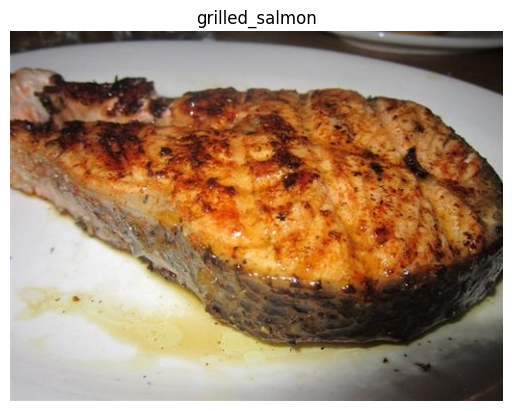

In [7]:
# Visualize
import random

img = view_random_image(target_dir=train_dir, target_class=random.choice(class_names))

### 2. Preprocess the data

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator training  instance with data augmentation

train_datagen_augmented = ImageDataGenerator(
	rescale=1/255.,
	rotation_range=0.2,
	shear_range=0.2,
	zoom_range=0.2,
	width_shift_range=0.2,
	height_shift_range=0.3,
	horizontal_flip=True
)

# Create ImageDataGenerator without data augmentation for the test dataset

test_datagen = ImageDataGenerator(
    rescale=1/255.
)

train_data = train_datagen_augmented.flow_from_directory(

	train_dir,
	target_size=(224, 224),
	batch_size=32,
	class_mode="categorical",
	shuffle=True
)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [9]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

(-0.5, 223.5, 223.5, -0.5)

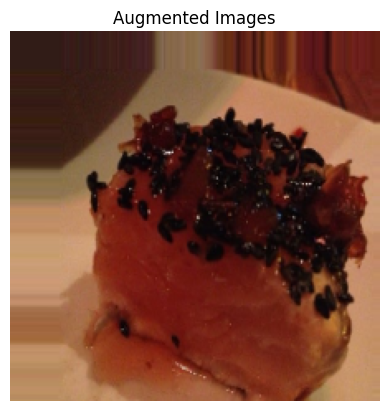

In [10]:
random_number = random.randint(0, len(images))
plt.imshow(images[random_number])
plt.title(f"Augmented Images")
plt.axis(False)

### 3. Create a model

In [28]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
from tensorflow.random import set_seed
import tensorflow as tf

In [31]:


model_11 = Sequential([
  Conv2D(10,3, input_shape=(224, 224,3)),
  Activation(activation="relu"),
  Conv2D(10,3, activation="relu"),
  MaxPool2D(),
  Conv2D(10,3, activation="relu"),
  Conv2D(10,3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax")

])

model_11.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(),
    metrics=['accuracy']
)

history_11 = model_11.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 122s 511ms/step - loss: 2.2188 - accuracy: 0.1767 - val_loss: 2.0836 - val_accuracy: 0.2596
Epoch 2/5
235/235 [==============================] - 107s 457ms/step - loss: 2.1012 - accuracy: 0.2509 - val_loss: 1.9815 - val_accuracy: 0.3188
Epoch 3/5
235/235 [==============================] - 108s 460ms/step - loss: 2.0430 - accuracy: 0.2819 - val_loss: 1.8233 - val_accuracy: 0.3788
Epoch 4/5
235/235 [==============================] - 106s 450ms/step - loss: 1.9737 - accuracy: 0.3075 - val_loss: 1.8585 - val_accuracy: 0.3628
Epoch 5/5
235/235 [==============================] - 107s 454ms/step - loss: 1.9247 - accuracy: 0.3299 - val_loss: 1.8439 - val_accuracy: 0.3704


### Evaluate model

In [32]:
# PLot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for validating and training metrics
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # plot loss
  plt.plot(epochs, loss, label="Training_loss")
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()

  # PLot accuracy
  plt.figure()
  plt.plot(epochs, acc, label="training_accuracy")
  plt.plot(epochs, val_acc, label='val_accuracy')
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()


In [33]:
model_11.evaluate(test_data)

79/79 [==============================] - 6s 80ms/step - loss: 1.8439 - accuracy: 0.3704


[1.8439304828643799, 0.37040001153945923]

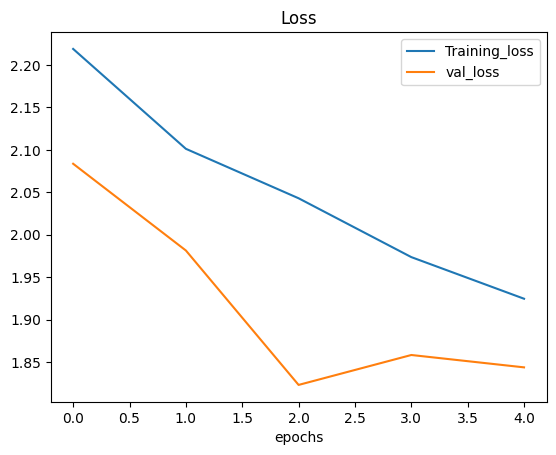

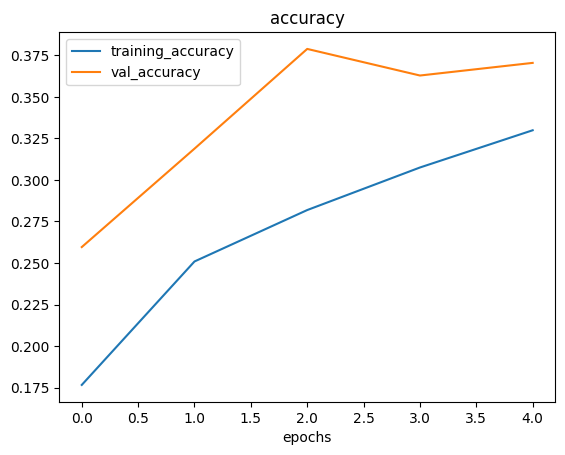

In [34]:
plot_loss_curves(history_11)

Model is not overfitting since lines are almost together. THis is because data augmentation

### Adjust hyper parameters and improve the model

In [22]:
model_11.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation_2 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_15 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 110, 110, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_17 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

Lets create a model with 1 more conv2D

In [25]:
model_12 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
     MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
]
)


model_12.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(),
    metrics=['accuracy']
)

history_12 = model_12.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)

)

Epoch 1/5
235/235 [==============================] - 113s 471ms/step - loss: 2.2209 - accuracy: 0.1724 - val_loss: 2.0619 - val_accuracy: 0.2556
Epoch 2/5
235/235 [==============================] - 102s 434ms/step - loss: 2.1015 - accuracy: 0.2431 - val_loss: 1.9633 - val_accuracy: 0.3176
Epoch 3/5
235/235 [==============================] - 102s 432ms/step - loss: 2.0592 - accuracy: 0.2685 - val_loss: 1.9334 - val_accuracy: 0.3348
Epoch 4/5
235/235 [==============================] - 102s 435ms/step - loss: 2.0307 - accuracy: 0.2872 - val_loss: 1.9111 - val_accuracy: 0.3308
Epoch 5/5
235/235 [==============================] - 106s 453ms/step - loss: 2.0116 - accuracy: 0.2940 - val_loss: 1.9162 - val_accuracy: 0.3340


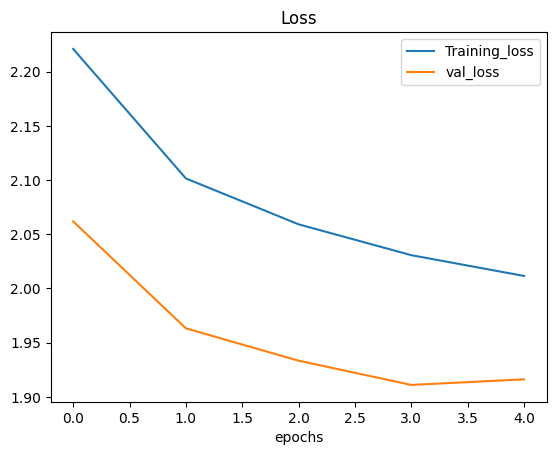

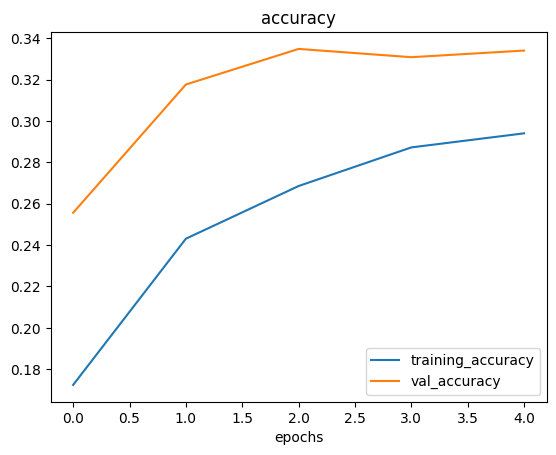

In [26]:
plot_loss_curves(history_12)

Create another model with different tweaks

In [ ]:
# Lets clone one model

In [35]:
model_13 = tf.keras.models.clone_model(model_11) # Model 11 performed better

# Compile the cloned model
model_13.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(),
    metrics=['accuracy']
)



In [36]:
model_13.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation_3 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_27 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 110, 110, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_29 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

In [37]:
history_13 = model_13.fit(
    train_data,
    epochs=10,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/10
235/235 [==============================] - 109s 454ms/step - loss: 2.2980 - accuracy: 0.1015 - val_loss: 2.2468 - val_accuracy: 0.1156
Epoch 2/10
235/235 [==============================] - 107s 456ms/step - loss: 2.2404 - accuracy: 0.1551 - val_loss: 2.1454 - val_accuracy: 0.2112
Epoch 3/10
235/235 [==============================] - 106s 451ms/step - loss: 2.1375 - accuracy: 0.2216 - val_loss: 1.9862 - val_accuracy: 0.3068
Epoch 4/10
235/235 [==============================] - 106s 450ms/step - loss: 2.0734 - accuracy: 0.2508 - val_loss: 1.9153 - val_accuracy: 0.3080
Epoch 5/10
235/235 [==============================] - 109s 464ms/step - loss: 2.0247 - accuracy: 0.2829 - val_loss: 1.8666 - val_accuracy: 0.3512
Epoch 6/10
235/235 [==============================] - 106s 450ms/step - loss: 1.9923 - accuracy: 0.2957 - val_loss: 1.8518 - val_accuracy: 0.3588
Epoch 7/10
235/235 [==============================] - 105s 446ms/step - loss: 1.9670 - accuracy: 0.3071 - val_loss: 1.8049 -

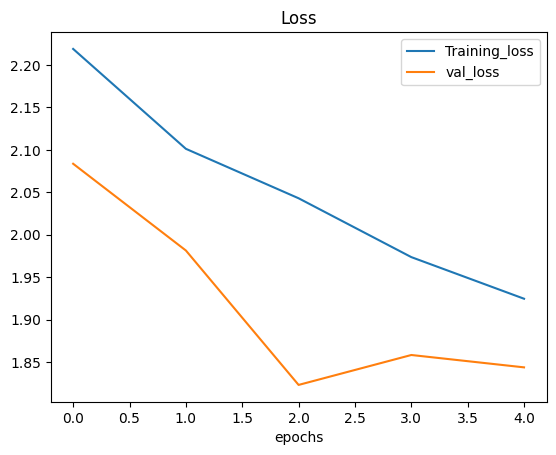

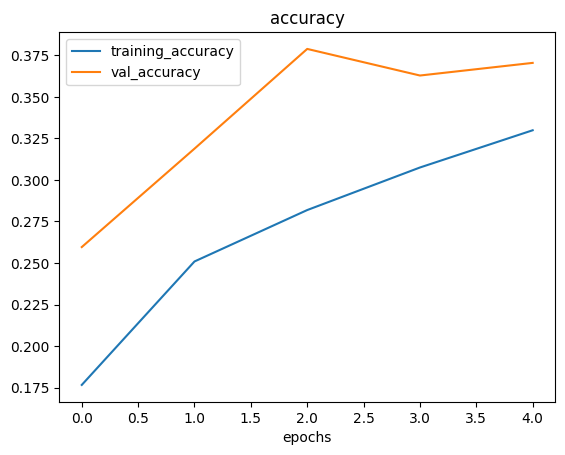

In [39]:
plot_loss_curves(history_11)

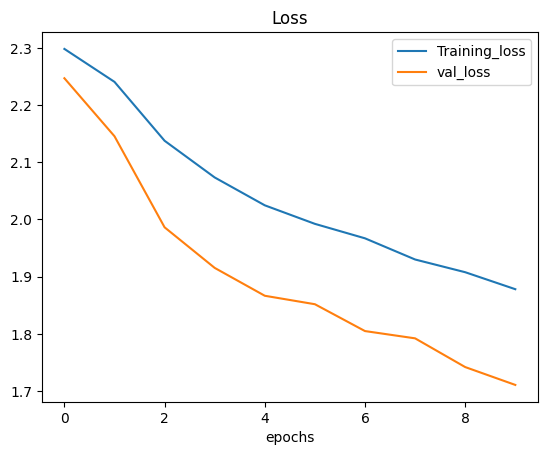

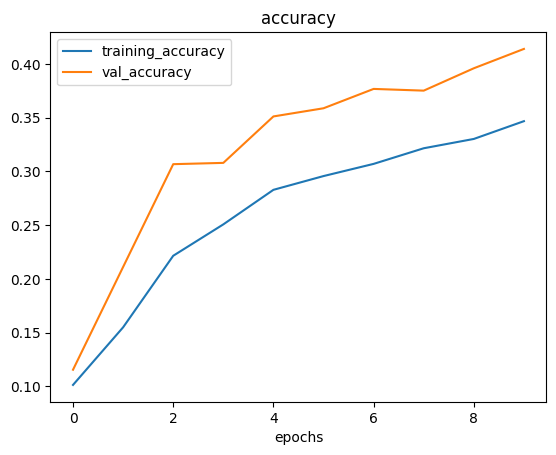

In [38]:
plot_loss_curves(history_13)

Model_13 performed much better a beat the baseline. We increase the epochs to 10 and worked!

### 7. Repeat until satisfied

Lets create another model with more fliters and another dense layer

In [41]:
model_14 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'), # added another dense layer
    Dense(10, activation='softmax')
])

# Compile the cloned model
model_14.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(),
    metrics=['accuracy']
)

history_14 = model_14.fit(
    train_data,
    epochs=10,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/10
235/235 [==============================] - 112s 458ms/step - loss: 2.2296 - accuracy: 0.1632 - val_loss: 2.0812 - val_accuracy: 0.2432
Epoch 2/10
235/235 [==============================] - 107s 453ms/step - loss: 2.1426 - accuracy: 0.2164 - val_loss: 2.0376 - val_accuracy: 0.2400
Epoch 3/10
235/235 [==============================] - 108s 458ms/step - loss: 2.0642 - accuracy: 0.2557 - val_loss: 1.9044 - val_accuracy: 0.3252
Epoch 4/10
235/235 [==============================] - 110s 470ms/step - loss: 2.0183 - accuracy: 0.2824 - val_loss: 1.8910 - val_accuracy: 0.3300
Epoch 5/10
235/235 [==============================] - 106s 453ms/step - loss: 1.9633 - accuracy: 0.3052 - val_loss: 1.7703 - val_accuracy: 0.3916
Epoch 6/10
235/235 [==============================] - 108s 460ms/step - loss: 1.8823 - accuracy: 0.3517 - val_loss: 1.7313 - val_accuracy: 0.4156
Epoch 7/10
235/235 [==============================] - 109s 463ms/step - loss: 1.8344 - accuracy: 0.3653 - val_loss: 1.8297 -

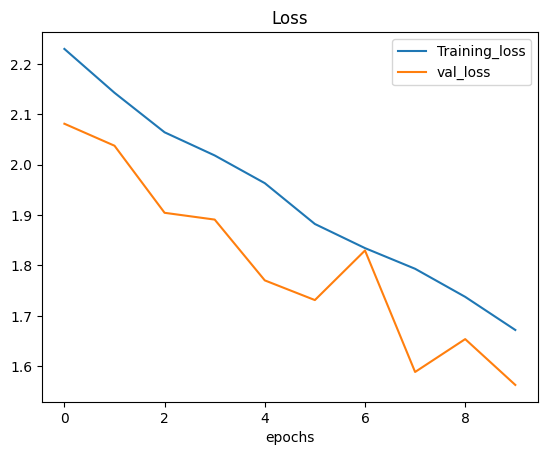

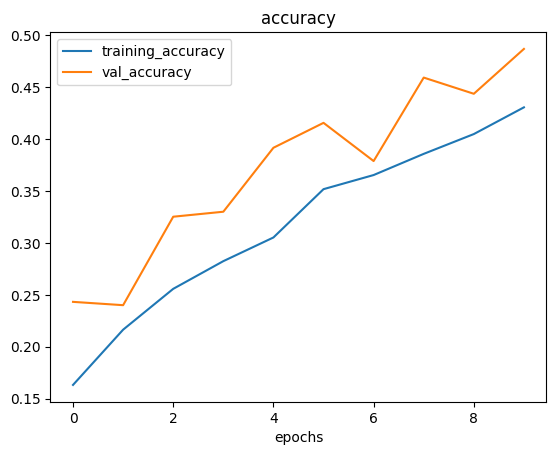

In [42]:
plot_loss_curves(history_14)

model_14 perfomed much better, lets continue tweaking other hyperparameters

**Importat to know:**
Epoch 1/10, Epoch 2/10, ...: These lines indicate which epoch the model is currently in. An epoch is one complete pass through the entire training dataset.

235/235 [==============================]: This line typically shows the number of steps or batches processed during the current epoch. In your case, it says 235/235, which means that your training data is divided into 235 batches, and the model has completed training on all of them in the current epoch.

- loss: The "loss" value is a measure of how well the model is performing on the training data. It's a single scalar value that represents the error or the difference between the model's predictions and the actual target values. The goal during training is to minimize this loss. In your example, you can see the loss value decreasing from one epoch to the next, which is a good sign.

- accuracy: The "accuracy" value is a metric that tells you how well the model is classifying the training data. It is the ratio of correctly predicted instances to the total number of instances in the training data. In your example, you can see the accuracy value increasing from one epoch to the next, which indicates that the model is getting better at classifying the training data.

- val_loss: This is the loss on a separate validation dataset. During training, a portion of the data is typically set aside as a validation dataset to monitor the model's generalization performance. The validation loss indicates how well the model is performing on data it hasn't seen during training. The goal is to minimize this value as well. It's important to monitor both the training loss and the validation loss to check for overfitting. If the training loss continues to decrease, but the validation loss starts to increase, it may be a sign that the model is overfitting.

- val_accuracy: Similar to "accuracy," this is the accuracy on the validation dataset. It indicates how well the model is classifying data it hasn't seen during training.

In [43]:
model_15 = Sequential([
    Conv2D(32,(5, 5), activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'), # added another dense layer
    Dense(10, activation='softmax')
])

# Compile the cloned model
model_15.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(),
    metrics=['accuracy']
)

history_15 = model_15.fit(
    train_data,
    epochs=30,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/30
235/235 [==============================] - 112s 461ms/step - loss: 2.2488 - accuracy: 0.1551 - val_loss: 2.1711 - val_accuracy: 0.1848
Epoch 2/30
235/235 [==============================] - 107s 456ms/step - loss: 2.1625 - accuracy: 0.2008 - val_loss: 2.0626 - val_accuracy: 0.2512
Epoch 3/30
235/235 [==============================] - 106s 452ms/step - loss: 2.0517 - accuracy: 0.2619 - val_loss: 1.8178 - val_accuracy: 0.3784
Epoch 4/30
235/235 [==============================] - 107s 454ms/step - loss: 1.9666 - accuracy: 0.3160 - val_loss: 1.8618 - val_accuracy: 0.3604
Epoch 5/30
235/235 [==============================] - 108s 459ms/step - loss: 1.8953 - accuracy: 0.3397 - val_loss: 1.7060 - val_accuracy: 0.4152
Epoch 6/30
235/235 [==============================] - 106s 451ms/step - loss: 1.8526 - accuracy: 0.3548 - val_loss: 1.6969 - val_accuracy: 0.4252
Epoch 7/30
235/235 [==============================] - 107s 453ms/step - loss: 1.7974 - accuracy: 0.3765 - val_loss: 1.6756 -

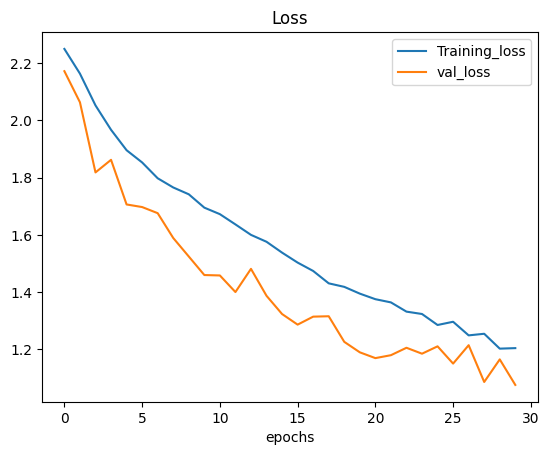

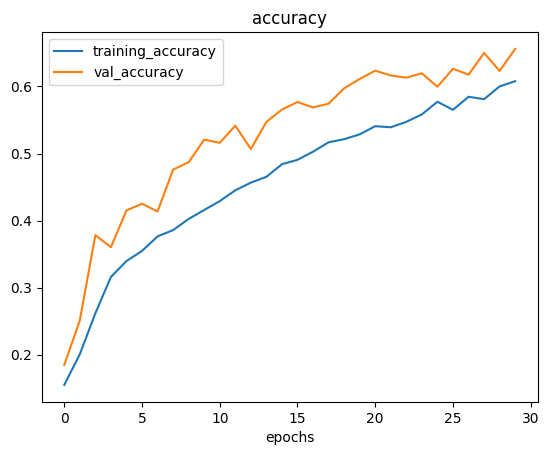

In [46]:
plot_loss_curves(history_15)

### Making prediction with trained model

Lets use our trained model to make some predictions

In [44]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [45]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg


In [49]:
# create a helper function to import an image and resize it to be able to use it in our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes to to
  (img_shape, img_shape, color_channels)
  """
  # read iamge
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor
  img = tf.image.decode_image(img)

  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])

  # Rescale image (get values between 0 and 1)
  img = img/255.

  # Expand dim
  #img = tf.expand_dims(img, axis=0)

  return img

In [52]:
# Reconfig function to work with multiple imagess
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title
  """

  # Import the target image and preprocess it

  img = load_and_prep_image(filename, 224)
  print(img.shape)

  # Make prediciton
  pred = model.predict(tf.expand_dims(img, axis=0))



 # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])]

  # PLot image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)


(224, 224, 3)
1/1 [==============================] - 0s 18ms/step


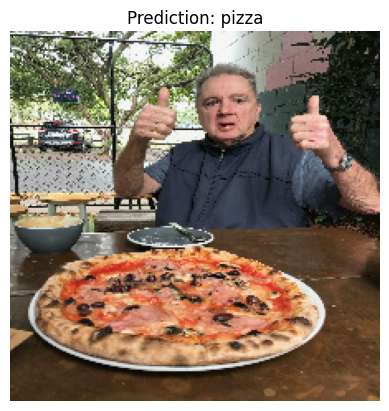

In [53]:
pred_and_plot(model_15, filename="03-pizza-dad.jpeg", class_names=class_names)

(224, 224, 3)
1/1 [==============================] - 0s 18ms/step


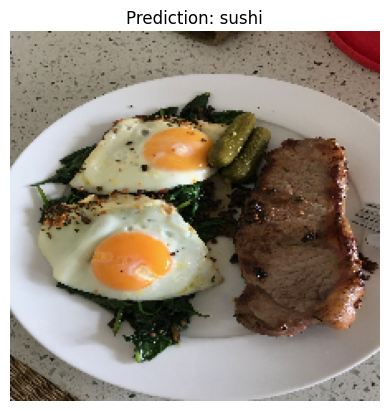

In [54]:
pred_and_plot(model_15, filename="03-steak.jpeg", class_names=class_names)

(224, 224, 3)
1/1 [==============================] - 0s 21ms/step


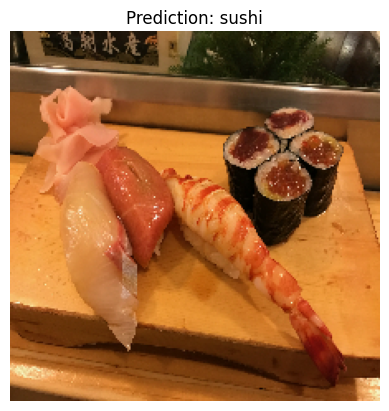

In [55]:
pred_and_plot(model_15, filename="03-sushi.jpeg", class_names=class_names)

In [56]:
# Saving and loading our model
model_15.save("model_15_saved_trained_model")

In [57]:
# Load model
loaded_model_15 = tf.keras.models.load_model("model_15_saved_trained_model")

In [58]:
loaded_model_15.evaluate(test_data)

79/79 [==============================] - 8s 96ms/step - loss: 1.0762 - accuracy: 0.6560


[1.0761926174163818, 0.656000018119812]

In [ ]:
from google.colab import files

files.download("/content/model_15_saved_trained_model")

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
!zip -r /content/model_15_trained.zip /content/model_15_saved_trained_model


  adding: content/model_15_saved_trained_model/ (stored 0%)
  adding: content/model_15_saved_trained_model/keras_metadata.pb (deflated 92%)
  adding: content/model_15_saved_trained_model/assets/ (stored 0%)
  adding: content/model_15_saved_trained_model/fingerprint.pb (stored 0%)
  adding: content/model_15_saved_trained_model/variables/ (stored 0%)
  adding: content/model_15_saved_trained_model/variables/variables.data-00000-of-00001 (deflated 24%)
  adding: content/model_15_saved_trained_model/variables/variables.index (deflated 65%)
  adding: content/model_15_saved_trained_model/saved_model.pb (deflated 88%)


In [ ]:
from google.colab import files

# If your folder is zipped, specify the zip file path
zip_file_path = "/content/model_15_trained.zip"


# Use the following line to download the folder
files.download(zip_file_path)  # or folder_path if your folder is not zipped
